In [56]:
# Your code here
!kaggle competitions download -c DontGetKicked

Traceback (most recent call last):
  File "/home/vscode/.local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/home/vscode/.local/lib/python3.10/site-packages/kaggle/__init__.py", line 7, in <module>
    api.authenticate()
  File "/home/vscode/.local/lib/python3.10/site-packages/kaggle/api/kaggle_api_extended.py", line 398, in authenticate
    raise IOError('Could not find {}. Make sure it\'s located in'
OSError: Could not find kaggle.json. Make sure it's located in /home/vscode/.kaggle. Or use the environment method.


In [57]:
# Open the zip file
import zipfile
zip_path = '/workspaces/Isabell-Joane-Eric-Final-Project/src/DontGetKicked.zip'
extract_to = '/workspaces/Isabell-Joane-Eric-Final-Project/data/processed'
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    # Extract all the contents into the directory
    zip_ref.extractall(extract_to)

In [58]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import numpy as np

total_data = pd.read_csv('/workspaces/Isabell-Joane-Eric-Final-Project/data/processed/training.csv')

total_data.head()

,RefId,IsBadBuy,PurchDate,Auction,VehYear,VehicleAge,Make,Model,Trim,SubModel,...,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,PRIMEUNIT,AUCGUART,BYRNO,VNZIP1,VNST,VehBCost,IsOnlineSale,WarrantyCost
0,1,0,12/7/2009,ADESA,2006,3,MAZDA,MAZDA3,i,4D SEDAN I,...,11597.0,12409.0,NaN,NaN,21973,33619,FL,7100.0,0,1113
1,2,0,12/7/2009,ADESA,2004,5,DODGE,1500 RAM PICKUP 2WD,ST,QUAD CAB 4.7L SLT,...,11374.0,12791.0,NaN,NaN,19638,33619,FL,7600.0,0,1053
2,3,0,12/7/2009,ADESA,2005,4,DODGE,STRATUS V6,SXT,4D SEDAN SXT FFV,...,7146.0,8702.0,NaN,NaN,19638,33619,FL,4900.0,0,1389
3,4,0,12/7/2009,ADESA,2004,5,DODGE,NEON,SXT,4D SEDAN,...,4375.0,5518.0,NaN,NaN,19638,33619,FL,4100.0,0,630
4,5,0,12/7/2009,ADESA,2005,4,FORD,FOCUS,ZX3,2D COUPE ZX3,...,6739.0,7911.0,NaN,NaN,19638,33619,FL,4000.0,0,1020


In [59]:
# Remove columns "AUCGUART" and "PRIMEUNIT"
columns_to_remove = ["AUCGUART", "PRIMEUNIT"]
total_data = total_data.drop(columns_to_remove, axis=1)

In [60]:
# Convert PurchDate to datetime
total_data['PurchDate'] = pd.to_datetime(total_data['PurchDate'])

In [61]:
# Convert WheelTypeID to 'category'
total_data['WheelTypeID'] = total_data['WheelTypeID'].astype('category')

In [62]:
# Grouping zip codes into larger regions
# grouping zip codes by thetotal_datairst two digits:
total_data['ZipRegion'] = total_data['VNZIP1'].astype(str).str[:2]

In [63]:
total_data = total_data.drop('VNST', axis=1)

In [64]:
total_data = total_data.drop('VNZIP1', axis=1)

In [65]:
total_data.drop('BYRNO', axis=1, inplace=True)

In [66]:
total_data.drop('RefId', axis=1, inplace=True)

In [67]:
total_data.head()

,IsBadBuy,PurchDate,Auction,VehYear,VehicleAge,Make,Model,Trim,SubModel,Color,...,MMRAcquisitionRetailAveragePrice,MMRAcquisitonRetailCleanPrice,MMRCurrentAuctionAveragePrice,MMRCurrentAuctionCleanPrice,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,VehBCost,IsOnlineSale,WarrantyCost,ZipRegion
0,0,2009-12-07,ADESA,2006,3,MAZDA,MAZDA3,i,4D SEDAN I,RED,...,11636.0,13600.0,7451.0,8552.0,11597.0,12409.0,7100.0,0,1113,33
1,0,2009-12-07,ADESA,2004,5,DODGE,1500 RAM PICKUP 2WD,ST,QUAD CAB 4.7L SLT,WHITE,...,10897.0,12572.0,7456.0,9222.0,11374.0,12791.0,7600.0,0,1053,33
2,0,2009-12-07,ADESA,2005,4,DODGE,STRATUS V6,SXT,4D SEDAN SXT FFV,MAROON,...,6943.0,8457.0,4035.0,5557.0,7146.0,8702.0,4900.0,0,1389,33
3,0,2009-12-07,ADESA,2004,5,DODGE,NEON,SXT,4D SEDAN,SILVER,...,4658.0,5690.0,1844.0,2646.0,4375.0,5518.0,4100.0,0,630,33
4,0,2009-12-07,ADESA,2005,4,FORD,FOCUS,ZX3,2D COUPE ZX3,SILVER,...,7723.0,8707.0,3247.0,4384.0,6739.0,7911.0,4000.0,0,1020,33


In [68]:
total_data = total_data.drop(columns=['SubModel', 'Color', 'WheelType'])

In [69]:
total_data = total_data.drop(columns=['PurchDate'])

In [70]:
total_data.head()

,IsBadBuy,Auction,VehYear,VehicleAge,Make,Model,Trim,Transmission,WheelTypeID,VehOdo,...,MMRAcquisitionRetailAveragePrice,MMRAcquisitonRetailCleanPrice,MMRCurrentAuctionAveragePrice,MMRCurrentAuctionCleanPrice,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,VehBCost,IsOnlineSale,WarrantyCost,ZipRegion
0,0,ADESA,2006,3,MAZDA,MAZDA3,i,AUTO,1.0,89046,...,11636.0,13600.0,7451.0,8552.0,11597.0,12409.0,7100.0,0,1113,33
1,0,ADESA,2004,5,DODGE,1500 RAM PICKUP 2WD,ST,AUTO,1.0,93593,...,10897.0,12572.0,7456.0,9222.0,11374.0,12791.0,7600.0,0,1053,33
2,0,ADESA,2005,4,DODGE,STRATUS V6,SXT,AUTO,2.0,73807,...,6943.0,8457.0,4035.0,5557.0,7146.0,8702.0,4900.0,0,1389,33
3,0,ADESA,2004,5,DODGE,NEON,SXT,AUTO,1.0,65617,...,4658.0,5690.0,1844.0,2646.0,4375.0,5518.0,4100.0,0,630,33
4,0,ADESA,2005,4,FORD,FOCUS,ZX3,MANUAL,2.0,69367,...,7723.0,8707.0,3247.0,4384.0,6739.0,7911.0,4000.0,0,1020,33


In [71]:
# Assuming you have your data stored in variables x_data and y_data
X_train, X_test, y_train, y_test = train_test_split(total_data, total_data, test_size=0.2, random_state=42)

In [72]:
X_train

,IsBadBuy,Auction,VehYear,VehicleAge,Make,Model,Trim,Transmission,WheelTypeID,VehOdo,...,MMRAcquisitionRetailAveragePrice,MMRAcquisitonRetailCleanPrice,MMRCurrentAuctionAveragePrice,MMRCurrentAuctionCleanPrice,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,VehBCost,IsOnlineSale,WarrantyCost,ZipRegion
9093,0,MANHEIM,2007,2,FORD,FREESTYLE FWD V6 3.0,SEL,AUTO,1.0,72485,...,12866.0,14989.0,11778.0,13783.0,13220.0,15386.0,8000.0,0,1506,27
13320,0,MANHEIM,2004,5,GMC,ENVOY 4WD 6C 4.2L I6,SLE,AUTO,1.0,80338,...,7617.0,9350.0,8340.0,10119.0,9507.0,11429.0,7195.0,0,2152,21
29596,0,OTHER,2008,2,DODGE,CALIBER,SE,AUTO,1.0,51904,...,10852.0,11770.0,7901.0,8376.0,11284.0,11757.0,7300.0,0,754,74
45118,0,OTHER,2004,5,CHEVROLET,IMPALA 3.4L V6 SFI,Bas,AUTO,2.0,77375,...,4434.0,5803.0,3643.0,4910.0,4434.0,5803.0,5655.0,0,1974,80
2949,0,OTHER,2006,4,HYUNDAI,SONATA 4C,GLS,AUTO,1.0,62031,...,10231.0,11591.0,5989.0,7147.0,9257.0,10548.0,7900.0,0,728,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37194,1,MANHEIM,2007,3,CHRYSLER,SEBRING V6,Bas,AUTO,2.0,67452,...,10916.0,11881.0,7612.0,8615.0,10763.0,11962.0,8300.0,0,1118,46
6265,0,MANHEIM,2006,4,KIA,SPECTRA,EX,AUTO,1.0,67182,...,9019.0,9670.0,4194.0,5611.0,7125.0,8957.0,7045.0,0,533,30
54886,0,OTHER,2006,4,CHEVROLET,MALIBU 4C,LT,AUTO,1.0,89342,...,10348.0,11125.0,6736.0,8347.0,10068.0,11984.0,6700.0,0,1113,73
860,0,ADESA,2006,3,PONTIAC,G6 V6 3.5L V6 SFI,Bas,AUTO,1.0,78991,...,8158.0,9767.0,7148.0,8389.0,10401.0,12057.0,7295.0,0,1272,50


In [73]:
y_train

,IsBadBuy,Auction,VehYear,VehicleAge,Make,Model,Trim,Transmission,WheelTypeID,VehOdo,...,MMRAcquisitionRetailAveragePrice,MMRAcquisitonRetailCleanPrice,MMRCurrentAuctionAveragePrice,MMRCurrentAuctionCleanPrice,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,VehBCost,IsOnlineSale,WarrantyCost,ZipRegion
9093,0,MANHEIM,2007,2,FORD,FREESTYLE FWD V6 3.0,SEL,AUTO,1.0,72485,...,12866.0,14989.0,11778.0,13783.0,13220.0,15386.0,8000.0,0,1506,27
13320,0,MANHEIM,2004,5,GMC,ENVOY 4WD 6C 4.2L I6,SLE,AUTO,1.0,80338,...,7617.0,9350.0,8340.0,10119.0,9507.0,11429.0,7195.0,0,2152,21
29596,0,OTHER,2008,2,DODGE,CALIBER,SE,AUTO,1.0,51904,...,10852.0,11770.0,7901.0,8376.0,11284.0,11757.0,7300.0,0,754,74
45118,0,OTHER,2004,5,CHEVROLET,IMPALA 3.4L V6 SFI,Bas,AUTO,2.0,77375,...,4434.0,5803.0,3643.0,4910.0,4434.0,5803.0,5655.0,0,1974,80
2949,0,OTHER,2006,4,HYUNDAI,SONATA 4C,GLS,AUTO,1.0,62031,...,10231.0,11591.0,5989.0,7147.0,9257.0,10548.0,7900.0,0,728,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37194,1,MANHEIM,2007,3,CHRYSLER,SEBRING V6,Bas,AUTO,2.0,67452,...,10916.0,11881.0,7612.0,8615.0,10763.0,11962.0,8300.0,0,1118,46
6265,0,MANHEIM,2006,4,KIA,SPECTRA,EX,AUTO,1.0,67182,...,9019.0,9670.0,4194.0,5611.0,7125.0,8957.0,7045.0,0,533,30
54886,0,OTHER,2006,4,CHEVROLET,MALIBU 4C,LT,AUTO,1.0,89342,...,10348.0,11125.0,6736.0,8347.0,10068.0,11984.0,6700.0,0,1113,73
860,0,ADESA,2006,3,PONTIAC,G6 V6 3.5L V6 SFI,Bas,AUTO,1.0,78991,...,8158.0,9767.0,7148.0,8389.0,10401.0,12057.0,7295.0,0,1272,50


In [74]:
X_test

,IsBadBuy,Auction,VehYear,VehicleAge,Make,Model,Trim,Transmission,WheelTypeID,VehOdo,...,MMRAcquisitionRetailAveragePrice,MMRAcquisitonRetailCleanPrice,MMRCurrentAuctionAveragePrice,MMRCurrentAuctionCleanPrice,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,VehBCost,IsOnlineSale,WarrantyCost,ZipRegion
27851,0,MANHEIM,2003,6,FORD,WINDSTAR FWD V6 3.8L,LX,AUTO,2.0,70008,...,3391.0,4415.0,2554.0,3504.0,3258.0,4284.0,4200.0,0,2157,32
51596,0,MANHEIM,2004,5,FORD,EXPLORER 4WD V6,XLS,AUTO,3.0,84628,...,6550.0,8008.0,6473.0,7954.0,10117.0,11622.0,6800.0,0,1893,80
31933,0,OTHER,2005,4,CHRYSLER,PACIFICA FWD 3.5L V6,Tou,AUTO,1.0,59369,...,7954.0,9450.0,6600.0,8005.0,7628.0,9145.0,8800.0,0,1086,29
12335,0,OTHER,2006,3,PONTIAC,G6 V6 3.5L V6 SFI,Bas,AUTO,1.0,74180,...,8461.0,9821.0,6528.0,8010.0,7550.0,9151.0,7305.0,0,1272,95
68933,0,ADESA,2006,3,MITSUBISHI,ENDEAVOR FWD 3.8L V6,LS,AUTO,1.0,74783,...,10129.0,12052.0,8236.0,9456.0,11631.0,12895.0,8300.0,0,569,32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52554,0,MANHEIM,2004,6,MAZDA,MAZDA6,i,AUTO,1.0,54556,...,8369.0,10100.0,5396.0,6482.0,8699.0,9797.0,8405.0,1,1003,39
50223,0,MANHEIM,2004,5,DODGE,CARAVAN FWD V6 3.3L,SE,AUTO,2.0,82670,...,3561.0,3966.0,5211.0,6493.0,6128.0,7512.0,4335.0,0,1763,78
15260,1,MANHEIM,2005,5,CHEVROLET,IMPALA,Bas,AUTO,2.0,73718,...,7804.0,9480.0,4352.0,5620.0,7033.0,8788.0,6035.0,0,1974,94
26629,0,MANHEIM,2007,2,DODGE,CALIBER 2.0L I4 SFI,Bas,AUTO,2.0,61636,...,8714.0,10384.0,7639.0,8875.0,11066.0,12247.0,7540.0,0,825,75


In [75]:
y_test

,IsBadBuy,Auction,VehYear,VehicleAge,Make,Model,Trim,Transmission,WheelTypeID,VehOdo,...,MMRAcquisitionRetailAveragePrice,MMRAcquisitonRetailCleanPrice,MMRCurrentAuctionAveragePrice,MMRCurrentAuctionCleanPrice,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,VehBCost,IsOnlineSale,WarrantyCost,ZipRegion
27851,0,MANHEIM,2003,6,FORD,WINDSTAR FWD V6 3.8L,LX,AUTO,2.0,70008,...,3391.0,4415.0,2554.0,3504.0,3258.0,4284.0,4200.0,0,2157,32
51596,0,MANHEIM,2004,5,FORD,EXPLORER 4WD V6,XLS,AUTO,3.0,84628,...,6550.0,8008.0,6473.0,7954.0,10117.0,11622.0,6800.0,0,1893,80
31933,0,OTHER,2005,4,CHRYSLER,PACIFICA FWD 3.5L V6,Tou,AUTO,1.0,59369,...,7954.0,9450.0,6600.0,8005.0,7628.0,9145.0,8800.0,0,1086,29
12335,0,OTHER,2006,3,PONTIAC,G6 V6 3.5L V6 SFI,Bas,AUTO,1.0,74180,...,8461.0,9821.0,6528.0,8010.0,7550.0,9151.0,7305.0,0,1272,95
68933,0,ADESA,2006,3,MITSUBISHI,ENDEAVOR FWD 3.8L V6,LS,AUTO,1.0,74783,...,10129.0,12052.0,8236.0,9456.0,11631.0,12895.0,8300.0,0,569,32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52554,0,MANHEIM,2004,6,MAZDA,MAZDA6,i,AUTO,1.0,54556,...,8369.0,10100.0,5396.0,6482.0,8699.0,9797.0,8405.0,1,1003,39
50223,0,MANHEIM,2004,5,DODGE,CARAVAN FWD V6 3.3L,SE,AUTO,2.0,82670,...,3561.0,3966.0,5211.0,6493.0,6128.0,7512.0,4335.0,0,1763,78
15260,1,MANHEIM,2005,5,CHEVROLET,IMPALA,Bas,AUTO,2.0,73718,...,7804.0,9480.0,4352.0,5620.0,7033.0,8788.0,6035.0,0,1974,94
26629,0,MANHEIM,2007,2,DODGE,CALIBER 2.0L I4 SFI,Bas,AUTO,2.0,61636,...,8714.0,10384.0,7639.0,8875.0,11066.0,12247.0,7540.0,0,825,75


In [76]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
import category_encoders as ce

# Load a sample of the data to reduce memory usage
total_data = pd.read_csv('/workspaces/Isabell-Joane-Eric-Final-Project/data/processed/training.csv').sample(frac=0.1, random_state=42)

# Print the column names to verify
print(total_data.columns)

# Check data balance
lemon_count = total_data['IsBadBuy'].sum()
non_lemon_count = len(total_data) - lemon_count
total_count = len(total_data)

print(f"Total samples: {total_count}")
print(f"Lemon samples: {lemon_count} ({(lemon_count / total_count) * 100:.2f}%)")
print(f"Non-lemon samples: {non_lemon_count} ({(non_lemon_count / total_count) * 100:.2f}%)")

# Define the final set of features for the model
features = ['Auction', 'VehYear', 'VehicleAge', 'Make', 'Model', 'Trim', 'Transmission', 'WheelTypeID', 'VehOdo', 
            'Nationality', 'Size', 'TopThreeAmericanName', 'MMRAcquisitionAuctionAveragePrice', 'MMRAcquisitionAuctionCleanPrice', 
            'MMRAcquisitionRetailAveragePrice', 'MMRAcquisitonRetailCleanPrice', 'MMRCurrentAuctionAveragePrice', 
            'MMRCurrentAuctionCleanPrice', 'MMRCurrentRetailAveragePrice', 'MMRCurrentRetailCleanPrice', 'VehBCost', 
            'IsOnlineSale', 'WarrantyCost']

if 'ZipRegion' in total_data.columns:
    features.append('ZipRegion')

target = "IsBadBuy"

# Extract the features and target variable from the dataset
X = total_data[features]
y = total_data[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the preprocessor for the pipeline
numeric_features = ['VehYear', 'VehicleAge', 'VehOdo', 'MMRAcquisitionAuctionAveragePrice', 'MMRAcquisitionAuctionCleanPrice',
                    'MMRAcquisitionRetailAveragePrice', 'MMRAcquisitonRetailCleanPrice', 'MMRCurrentAuctionAveragePrice',
                    'MMRCurrentAuctionCleanPrice', 'MMRCurrentRetailAveragePrice', 'MMRCurrentRetailCleanPrice', 'VehBCost',
                    'WarrantyCost']

categorical_features = ['Auction', 'Make', 'Model', 'Trim', 'Transmission', 'WheelTypeID', 'Nationality', 'Size',
                        'TopThreeAmericanName', 'IsOnlineSale']

if 'ZipRegion' in total_data.columns:
    categorical_features.append('ZipRegion')

# Preprocessing pipelines for both numeric and categorical features
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Create the full pipeline with preprocessing and the classifier
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=10, max_depth=10, random_state=42))  # Reduced number of trees and max depth
])

# Fit the pipeline on the training data
pipeline.fit(X_train, y_train)

# Predict on the test set
y_pred = pipeline.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")


Index(['RefId', 'IsBadBuy', 'PurchDate', 'Auction', 'VehYear', 'VehicleAge',
       'Make', 'Model', 'Trim', 'SubModel', 'Color', 'Transmission',
       'WheelTypeID', 'WheelType', 'VehOdo', 'Nationality', 'Size',
       'TopThreeAmericanName', 'MMRAcquisitionAuctionAveragePrice',
       'MMRAcquisitionAuctionCleanPrice', 'MMRAcquisitionRetailAveragePrice',
       'MMRAcquisitonRetailCleanPrice', 'MMRCurrentAuctionAveragePrice',
       'MMRCurrentAuctionCleanPrice', 'MMRCurrentRetailAveragePrice',
       'MMRCurrentRetailCleanPrice', 'PRIMEUNIT', 'AUCGUART', 'BYRNO',
       'VNZIP1', 'VNST', 'VehBCost', 'IsOnlineSale', 'WarrantyCost'],
      dtype='object')
Total samples: 7298
Lemon samples: 834 (11.43%)
Non-lemon samples: 6464 (88.57%)
Accuracy: 0.8876712328767123


IndexError: list index out of range

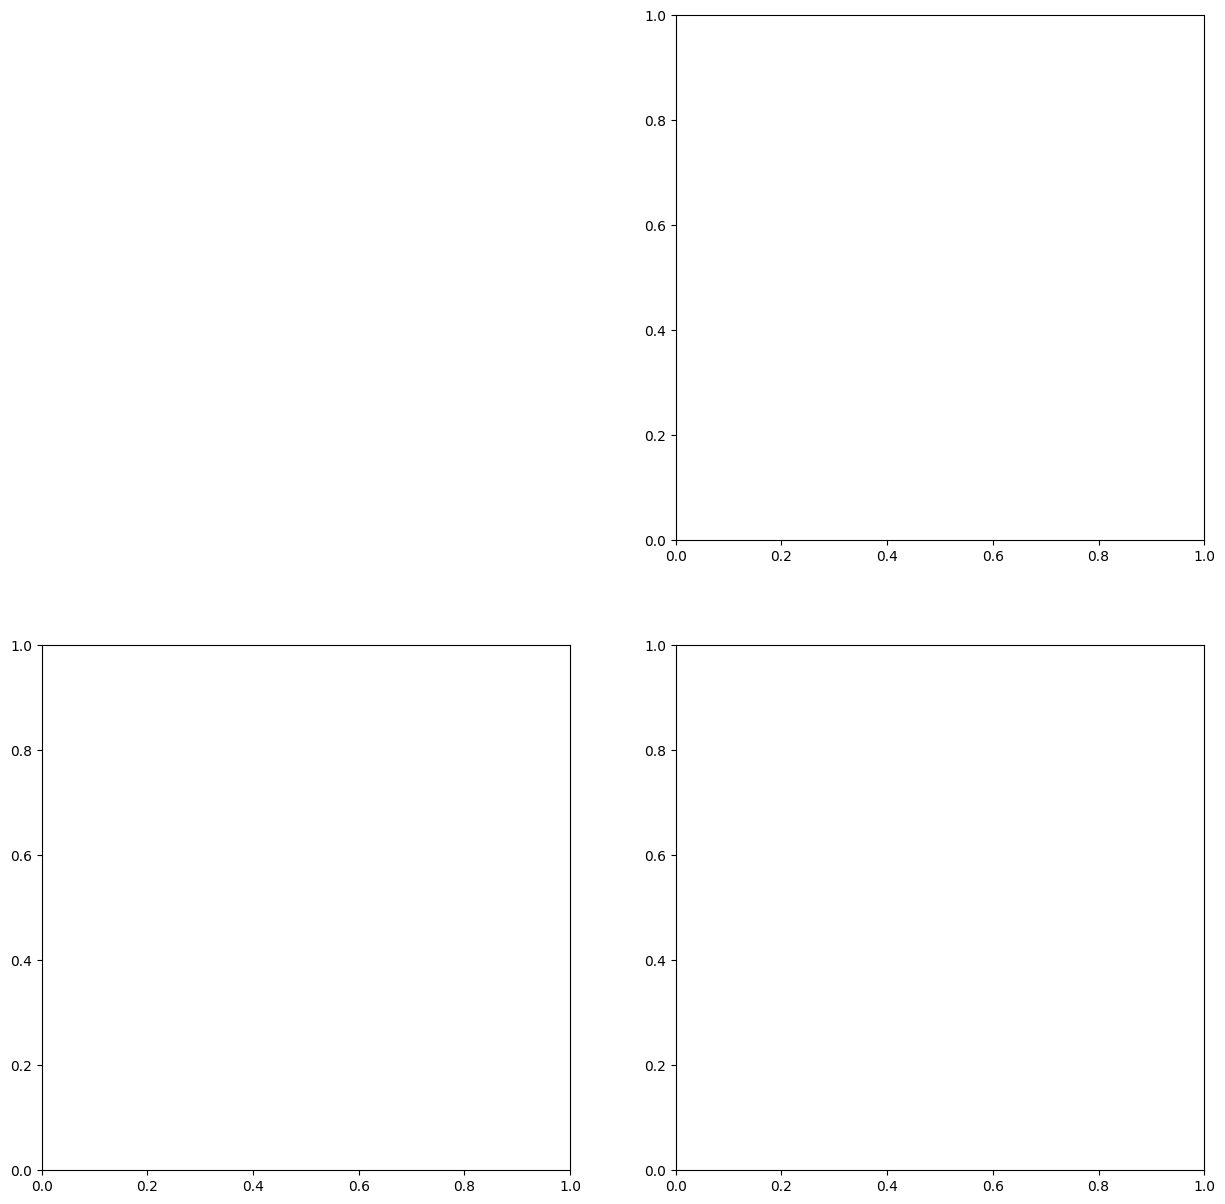

In [77]:
import matplotlib.pyplot as plt
from sklearn import tree 

fig, axes = plt.subplots(2, 2, figsize=(15, 15))

model = pipeline['classifier']

# Iterate over the first four trees and plot them 
for i in range(4):
    tree.plot_tree(model.estimators_[i], ax = axes.flat[i], feature_names = list(X_train.columns), class_names = ["0", "1"], filled = True)

plt.show()

In [ ]:
len(model.estimators_)

10

In [ ]:
model

RandomForestClassifier(max_depth=10, n_estimators=10, random_state=42)

In [ ]:

from sklearn.metrics import recall_score, precision_score

# ... (Assume you have your model trained and X_test data)

# Get probability estimates
y_proba = pipeline.predict_proba(X_test)[:, 1]  # Probability of the positive class

# Different thresholds
thresholds = [0.5, 0.4, 0.3, 0.2]

for threshold in thresholds:
    y_pred = (y_proba >= threshold).astype('int')
    recall = recall_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)